# Valutazione Funzione di Rilevamento

In [2]:
from funzione_di_rilevamento import get_parametri_rilevamento
from funzione_di_rilevamento import get_dati_da_analizzare
from funzione_di_rilevamento import get_risultati 
parametri_rilevamento=list(get_parametri_rilevamento())
dati_analizzati=str(get_dati_da_analizzare())
risultati_da_leggere=str(get_risultati())
file_report='report_metriche.csv'
print(parametri_rilevamento)
print(dati_analizzati)
print(risultati_da_leggere)

[20, 50, 0.6, 65, 0.1, 0.4]
dati_2.csv
risultati_2.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import csv

dati=pd.read_csv(risultati_da_leggere ,usecols=["Id","Prima etichetta","Pr Prima etichetta","Luogo","Orario","Verita Seconda etichetta","Tipo situazione","Seconda etichetta", "Pr Seconda etichetta","Incertezza Sistema"])
dati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        599 non-null    int64  
 1   Prima etichetta           599 non-null    object 
 2   Pr Prima etichetta        599 non-null    int64  
 3   Luogo                     599 non-null    object 
 4   Orario                    599 non-null    int64  
 5   Verita Seconda etichetta  599 non-null    object 
 6   Tipo situazione           599 non-null    object 
 7   Seconda etichetta         599 non-null    object 
 8   Pr Seconda etichetta      599 non-null    int64  
 9   Incertezza Sistema        599 non-null    float64
dtypes: float64(1), int64(4), object(5)
memory usage: 46.9+ KB


### Positivi=Sospetti ,    Negativi=Non sospetti

## Actual condition

In [4]:
n=dati[dati['Verita Seconda etichetta']=="Non sospetto"]['Id'].count() #numero casi negativi reali nei dati
p=dati[dati['Verita Seconda etichetta']=="Sospetto"]['Id'].count() #numero casi positivi reali nei dati
t=n+p #casi totali
print(f'N:{n}, P:{p}, T:{t}')

N:527, P:72, T:599


## Predicted condition

In [5]:
esatti=dati[dati['Verita Seconda etichetta']==dati['Seconda etichetta']]# dati per cui la predizione è esatta
Tt=esatti['Id'].count() #numero casi per cui la predizione è esatta
Tn=esatti[esatti['Seconda etichetta']=="Non sospetto"]['Id'].count() # numero casi  correttamente etichettati come negativo
Tp=esatti[esatti['Seconda etichetta']=="Sospetto"]['Id'].count() # numero casi correttamente etichettati come positivi
print(f'Tn:{Tn}, Tp:{Tp}, TT:{Tt}')


Tn:518, Tp:34, TT:552


In [6]:
errati=dati[dati['Verita Seconda etichetta']!=dati['Seconda etichetta']]# dati per cui la predizione è errata
Ft=errati['Id'].count() #numero casi per cui la predizione è errata
Fn=errati[errati['Seconda etichetta']=="Non sospetto"]['Id'].count() # numero casi erroneamente etichettati come negativi
Fp=errati[errati['Seconda etichetta']=="Sospetto"]['Id'].count() # numero casi erroneamente etichettati come positivi
print(f'Fn:{Fn}, Fp:{Fp}, Ft:{Ft}')

Fn:38, Fp:9, Ft:47


## Metrics

In [7]:
Prevalence=round(p/(p+n),4) #prevalenza
print(f'Prevalence:{Prevalence}')

Prevalence:0.1202


In [8]:
tpr= round(Tp/p,4) #sensitivity, recall, hit rate, or true positive rate
tnr= round(Tn/n,4) #specificity, selectivity or true negative rate
#PPV= round((TPR*Prevalence)/((TPR*Prevalence)+(1-TNR)*(1-Prevalence)),4)
ppv= round(Tp/(Tp+Fp),4) #precision, precisione
#NPV= round((TNR*(1-Prevalence))/((TNR*(1-Prevalence))+(1-TPR)*Prevalence),4)
npv= round(Tn/(Tn+Fn),4) #negative predictive value
print(f'TPR:{tpr}, TNR:{tnr}, PPV:{ppv}, NPV:{npv}')

TPR:0.4722, TNR:0.9829, PPV:0.7907, NPV:0.9317


In [9]:
acc=round((Tp+Tn)/(p+n),4) #accuracy, frazione corretta
ba=round((tpr+tnr)/2,4) #balanced accuracy
dor=round((Tp*Tn)/(Fp*Fn),4)  #diagnostic odds ratio
F_score=round(2*(ppv*tpr)/(ppv+tpr),4) #harmonic mean of precision and sensitivity
print(f'ACC:{acc}, BA:{ba}, DOR:{dor}, F_score:{F_score}')

ACC:0.9215, BA:0.7276, DOR:51.4971, F_score:0.5913


#### Incertezza sistema

I_max:0.75, I_min:0.06, I_media:0.44, I_mediana:0.45, I_moda:0    0.55
Name: Incertezza Sistema, dtype: float64


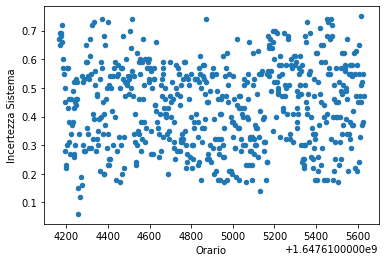

In [11]:
dati.plot.scatter(x="Orario", y="Incertezza Sistema")
incertezza_media= round(dati["Incertezza Sistema"].mean(),2)
incertezza_max= dati["Incertezza Sistema"].max()
incertezza_min= dati["Incertezza Sistema"].min()
incertezza_mediana= dati["Incertezza Sistema"].median()
incertezza_moda= dati["Incertezza Sistema"].mode()
print(f'I_max:{incertezza_max}, I_min:{incertezza_min}, I_media:{incertezza_media}, I_mediana:{incertezza_mediana}, I_moda:{incertezza_moda}')

## Salvataggio Metriche

In [12]:
with open(file_report, 'a', newline='\n') as file:
    writer = csv.writer(file)
    writer.writerow([dati_analizzati,parametri_rilevamento,risultati_da_leggere,n,p,t,Tn,Tp,Tt,Fn,Fp,Ft,Prevalence,tpr,tnr,ppv,npv,acc,ba,dor,F_score,incertezza_media,incertezza_max,incertezza_min,incertezza_mediana])
    